In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
from scipy.optimize import minimize

In [3]:
start_date = '2021-04-01'
end_date = '2022-04-15'

ticker = ['AAPL','TSLA','TSM','KO','COST','ADBE','NKE','SBUX','BAC']

In [4]:
df = pd.DataFrame()
for i in range(0,len(ticker)) :
    df_temp = pd.DataFrame(pdr.get_data_yahoo(ticker[i],start_date, end_date)['Adj Close'])
    df_temp = df_temp.rename(columns = {'Adj Close':ticker[i]})
    df = pd.concat([df, df_temp], axis = 1)

In [5]:
df_rtn= df.pct_change().dropna()
df_rtn

,AAPL,TSLA,TSM,KO,COST,ADBE,NKE,SBUX,BAC
Date,,,,,,,,,
2021-04-01,0.006959,-0.009252,0.055123,-0.003794,0.006979,0.016766,-0.002709,0.001007,0.020677
2021-04-05,0.023577,0.044277,-0.002404,0.005713,0.016566,0.017131,0.019543,0.014994,0.007850
2021-04-06,0.002462,0.000825,-0.016546,0.007196,-0.001940,-0.000570,0.015098,0.019186,-0.002764
2021-04-07,0.013390,-0.029857,-0.020827,0.001692,-0.003638,0.004213,-0.004520,0.000354,0.009070
2021-04-08,0.019234,0.019122,0.029527,-0.003003,0.006717,0.013032,-0.020946,-0.001325,-0.008739
...,...,...,...,...,...,...,...,...,...
2022-04-08,-0.011909,-0.030049,-0.012236,0.006148,-0.013173,-0.016301,-0.009507,-0.019249,0.007108
2022-04-11,-0.025516,-0.048328,-0.017323,-0.000313,-0.025615,-0.024476,-0.024737,-0.010304,-0.002017
2022-04-12,0.011523,0.011292,-0.001332,0.011754,-0.005661,-0.017655,0.000480,-0.011031,-0.010609


In [6]:
df_dev = df_rtn.std()
df_dev

AAPL    0.015408
TSLA    0.033958
TSM     0.019890
KO      0.009190
COST    0.012713
ADBE    0.021611
NKE     0.018755
SBUX    0.015952
BAC     0.016960
dtype: float64

In [7]:
df_dev_1y = df_rtn.std()*((255/len(df_rtn))**0.5)
df_dev_1y

AAPL    0.015172
TSLA    0.033437
TSM     0.019585
KO      0.009049
COST    0.012518
ADBE    0.021280
NKE     0.018468
SBUX    0.015707
BAC     0.016700
dtype: float64

In [9]:
df_rtn_1y = pd.DataFrame(1 + df_rtn.mean()).T.prod()**(255) - 1
df_rtn_1y

AAPL    0.389612
TSLA    0.685605
TSM    -0.106139
KO      0.275947
COST    0.694568
ADBE   -0.057148
NKE     0.056876
SBUX   -0.228298
BAC     0.026848
dtype: float64

In [11]:
rf = 0.02
df_srp = ((df_rtn_1y - rf) / df_dev_1y) * 1/100
df_srp

AAPL    0.243620
TSLA    0.199061
TSM    -0.064404
KO      0.282843
COST    0.538864
ADBE   -0.036254
NKE     0.019968
SBUX   -0.158079
BAC     0.004100
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratio : Excess_Rtn/Stdev'}>

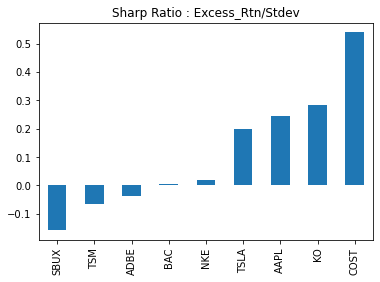

In [12]:
df_srp.sort_values().plot.bar(title = "Sharp Ratio : Excess_Rtn/Stdev")

<AxesSubplot:xlabel='Date'>

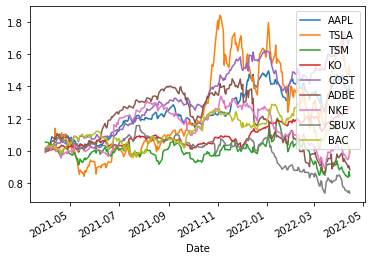

In [13]:
df_cumrtn = (1+df_rtn).cumprod()
df_cumrtn.plot()

<AxesSubplot:xlabel='Date'>

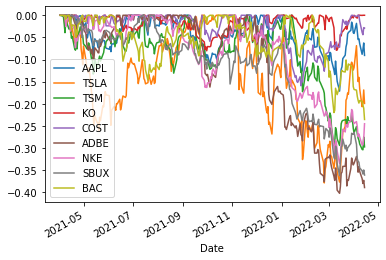

In [15]:
df_cumrtn_peak = df_cumrtn.cummax()
df_mdd = (df_cumrtn - df_cumrtn_peak) / df_cumrtn_peak
df_mdd.plot()

In [17]:
def get_mdd(rtn):
    df_cumrtn = (1 + rtn).cumprod()
    df_cumrtn_peak = df_cumrtn.cummax()
    df_mdd = (df_cumrtn - df_cumrtn_peak) / df_cumrtn_peak
    return df_mdd

<AxesSubplot:xlabel='Date'>

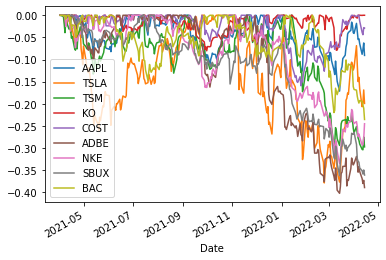

In [20]:
df_mdd = get_mdd(df_rtn)
df_mdd.plot()

In [22]:
df_mdd['TSLA'].idxmin()

Timestamp('2022-02-23 00:00:00')

<AxesSubplot:xlabel='Date'>

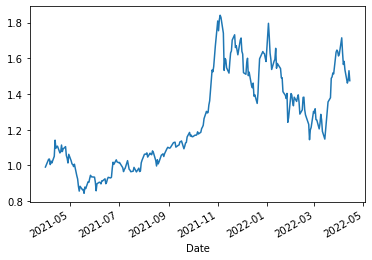

In [24]:
df_cumrtn['TSLA'].plot()

In [25]:
df_cov_1y = df_rtn.cov() * np.sqrt(255)
df_cov_1y

,AAPL,TSLA,TSM,KO,COST,ADBE,NKE,SBUX,BAC
AAPL,0.003791,0.003983,0.002567,0.000552,0.001514,0.003243,0.001751,0.002043,0.001102
TSLA,0.003983,0.018414,0.004597,-0.000096,0.001845,0.005448,0.002467,0.002727,0.001908
TSM,0.002567,0.004597,0.006318,0.000354,0.001092,0.002998,0.001673,0.001832,0.001958
KO,0.000552,-0.000096,0.000354,0.001349,0.000659,0.000331,0.000397,0.000668,0.000613
COST,0.001514,0.001845,0.001092,0.000659,0.002581,0.002159,0.001096,0.001288,0.000300
ADBE,0.003243,0.005448,0.002998,0.000331,0.002159,0.007458,0.002416,0.002404,0.000725
NKE,0.001751,0.002467,0.001673,0.000397,0.001096,0.002416,0.005617,0.002237,0.001591
SBUX,0.002043,0.002727,0.001832,0.000668,0.001288,0.002404,0.002237,0.004063,0.001453
BAC,0.001102,0.001908,0.001958,0.000613,0.000300,0.000725,0.001591,0.001453,0.004593


In [26]:
wgt= np.repeat(1/len(ticker), len(ticker))
wgt

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [27]:
pf_rtn_1y = wgt @ df_rtn_1y
pf_rtn_1y

0.19309685598099374

In [28]:
pf_dev_1y = np.sqrt(wgt.T @ df_cov_1y @ wgt)
pf_dev_1y

0.04739704558066936

In [29]:
pf_srp = ((pf_rtn_1y - rf) / pf_dev_1y) * 1/100
pf_srp

0.036520600358177266

In [30]:
def get_pf_rtn(wgt, rtn) : 
    return wgt.T @ rtn
def get_pf_dev(wgt, cov) : 
    return (wgt.T @ cov @ wgt)**0.5
def get_pf_sr(wgt, rf, rtn, cov) : 
    return ((get_pf_rtn(wgt, rtn) - rf) / get_pf_dev(wgt, cov)) * 1/100

In [32]:
pf_rtn = get_pf_rtn(wgt, df_rtn_1y)
pf_rtn

0.19309685598099374

In [34]:
pf_dev = get_pf_dev(wgt, df_cov_1y)
pf_dev

0.04739704558066936

In [35]:
pf_srp = get_pf_sr(wgt, rf, df_rtn_1y, df_cov_1y)
pf_srp

0.036520600358177266

In [47]:
def get_min_sr_wgt(rf, rtn, cov):
    bounds = ((0.0, 1.0),) * len(rtn) 
    wgt_constrnts = {'type': 'eq','fun': lambda wgts: np.sum(wgts) - 1}
    def neg_sharpe(wgts, rf, rtn, cov):
        r = get_pf_rtn(wgts, rtn)
        dev = get_pf_dev(wgts, cov)
        return -(r - rf)/dev
    wgts = minimize(neg_sharpe, np.repeat(1/len(rtn), len(rtn)),
                   args=(rf, rtn, cov), method='SLSQP',
                   options={'disp': False},
                   constraints=(wgt_constrnts,),
                   bounds=bounds)
    return wgts.x
def optimal_weights(num, rtn, cov):
    def min_vol(tgt_rtn, rtn, cov):
        bounds = ((0, 1),) * len(rtn)
        wgt_constrnts = {'type': 'eq','fun': lambda wgts: np.sum(wgts) - 1}
        rtn_maximize = {'type': 'eq','args': (rtn,),'fun': lambda wgts, rtn: tgt_rtn - get_pf_rtn(wgts,rtn)}
        wgts = minimize(get_pf_dev, np.repeat(1/len(rtn), len(rtn)),args=(cov,), method='SLSQP',options={'disp': False}
                        ,constraints=(wgt_constrnts,rtn_maximize),bounds=bounds)
        return wgts.x        
    tgt_rtns = np.linspace(rtn.min(), rtn.max(), num)
    wgts = [min_vol(tgt_rtn, rtn, cov) for tgt_rtn in tgt_rtns]
    return wgts

In [57]:
def get_eff_frontier(num, rtn, cov) : 
    wgts = optimal_weights(num, rtn, cov)   
    rtns = [get_pf_rtn(wgt, rtn) for wgt in wgts]
    devs = [get_pf_dev(wgt, cov) for wgt in wgts]
    df = pd.DataFrame({"Rtns": rtns, "Devs": devs})
    ax = df.plot.line(x="Devs", y="Rtns", style='.-')
    ax.set_xlim(left = 0)
    eff_wgt = get_min_sr_wgt(rf, rtn, cov)
    eff_rtn = get_pf_rtn(eff_wgt, rtn)
    eff_dev = get_pf_dev(eff_wgt, cov)
    line_x = [0, eff_dev]
    line_y = [rf, eff_rtn]
    return ax.plot(line_x, line_y, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
def get_eff_wgt(num, rf, rtn, cov):
    eff_wgt = get_min_sr_wgt(rf, rtn, cov)
    eff_rtn = get_pf_rtn(eff_wgt, rtn)
    df = pd.DataFrame([ticker, eff_wgt]).T
    return df, eff_rtn

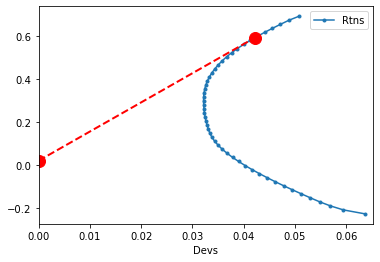

In [56]:
get_eff_frontier(num, df_rtn_1y, df_cov_1y)

In [58]:
df = get_eff_wgt(num, rf, rtn, cov)[0]
rtn = get_eff_wgt(num, rf, rtn, cov)[1]

In [59]:
df

,0,1
0,AAPL,0.0
1,TSLA,0.041237
2,TSM,0.0
3,KO,0.239591
4,COST,0.719172
5,ADBE,0.0
6,NKE,0.0
7,SBUX,0.0
8,BAC,0.0


In [60]:
rtn

0.5939005157313924